<a href="https://colab.research.google.com/github/tomishing/python_data_science_basics/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with decision tree

- Examine the effect of regulations on marijuana use
- Build the desision tree model for the prediction
- Evaluate the model

**The concept of decision tree**

The decision tree evaluates each feature by how much it reduces information (entropy or gini), and selects the one that gives the largest drop to make the best prediction model.

- index values: 0 to 1
- find features that approach to 0: the better model

**The Information gain = The drop in entropy**

- The information gain = Entropy before split weighted average Entropy after split

- Information gain measures how much uncertainty (entropy) is reduced by a split.

- A larger information gain means a bigger drop in entropy and a better split.




In [ ]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Import data

In [ ]:
mar = pd.read_csv('gss.csv').dropna()
mar

,index,age,educ,sex,race,polviews,polviews_num,marijuana,marijuana01
0,0,60,16,male,white,slightly liberal,3,should be legal,1
1,1,76,13,male,white,moderate,4,should be legal,1
2,2,61,16,female,other,conservative,6,should not be legal,0
3,3,20,14,female,white,liberal,2,should be legal,1
4,4,56,14,female,white,moderate,4,should be legal,1
...,...,...,...,...,...,...,...,...,...
950,995,38,16,female,white,moderate,4,should be legal,1
951,996,44,14,female,white,moderate,4,should be legal,1
952,997,39,19,female,white,extremely liberal,1,should be legal,1
953,998,71,18,male,white,liberal,2,should be legal,1


## 1. Prepare data for modeling

In [ ]:
# convert 'polviews' to categorical dummies

df01 = pd.get_dummies(mar, columns=['polviews'], prefix='pv', drop_first=True)

# create X and y
X = df01.drop(['polviews_num', 'race', 'sex', 'marijuana', 'marijuana01'], axis=1)
y = df01['marijuana01']
print(X.head())
print(y.head())

   index  age  educ  pv_extremely liberal  pv_liberal  pv_moderate  \
0      0   60    16                 False       False        False   
1      1   76    13                 False       False         True   
2      2   61    16                 False       False        False   
3      3   20    14                 False        True        False   
4      4   56    14                 False       False         True   

   pv_slightly conservative  pv_slightly liberal  
0                     False                 True  
1                     False                False  
2                     False                False  
3                     False                False  
4                     False                False  
0    1
1    1
2    0
3    1
4    1
Name: marijuana01, dtype: int64


## 2. Split data, initialize, and train the model

In [ ]:
seed = 123

# Split data into training and testing sets: 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=seed,
                                                    stratify=y)

- `train_test_split()`
A function from sklearn.model_selection that splits arrays or matrices into random train and test subsets.

- Inputs
`X`: Features (independent variables)
`y`: Target (dependent variable)

- Parameters
  - `test_size=0.3`:
30% of the data will go into the test set, and the remaining 70% into the training set.

  - `random_state=seed`:
Ensures reproducibility. If you run the code multiple times with the same seed, the split will be the same each time.

  - `stratify=y`:
Ensures the proportions of each class in y are preserved in both the training and testing sets.
Useful especially in classification problems where you want to keep the class distribution balanced.

- Outputs
  - `X_train`: Training features
  - `X_test`: Testing features
  - `y_train`: Training labels
  - `y_test`: Testing labels

**What is a class in ML?**

- Class
  - A class refers to a category or label in a classification problem.

  - It comes from the target variable (y), not from the features (X).

  - Example: If you're predicting whether a student passes or fails, then:

    - The classes are: pass and fail

    - If it's binary classification: 0 and 1

- Analogy

Imagine you're trying to predict the species of an animal:

  - Variables (features): weight, height, color, has_tail

  - Class (label): cat, dog, or rabbit

In [ ]:
# create a tree-like structure: initialize
classtreeModel = DecisionTreeClassifier(max_depth=5, criterion='entropy')


- This line creates a Decision Tree Classifier in Python using `scikit-learn`.

- This is a machine learning model used for classification tasks.
It creates a tree-like structure to split the data based on feature values and predicts a class (e.g., "spam" or "not spam").

- Parameters:
  - `max_depth=5`:
    - This sets the maximum depth of the tree to 5.
    - It controls how many levels/splits the tree can make.
    - Prevents the tree from growing too deep (which can cause overfitting).

  - `criterion='entropy'`
    - This tells the tree how to decide the best split at each node.

  - `entropy` uses Information Gain (from information theory).

  - Alternative: `gini` (uses Gini Impurity, the default in scikit-learn).

**Entropy vs. Gini:**

- Both measure impurity.
- Impurity means diversity
- **The formula of Entropy is the Shannon index.**
- Entropy is more theoretically rigorous, Gini is faster in practice.
- They often give similar results.

In [ ]:
# create a tree-like structure: fit the model to the training data
classtreeModel = classtreeModel.fit(X_train, y_train)

## 3. Visualize the trained decision tree

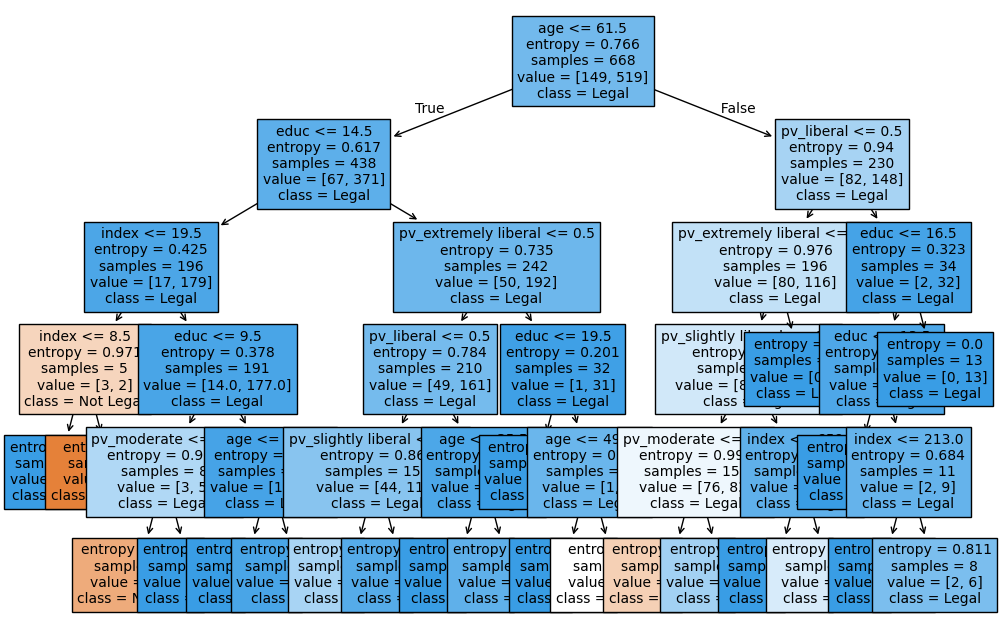

In [ ]:
plt.figure(figsize=[12, 8])
p = tree.plot_tree(classtreeModel, feature_names=X.columns,
                   class_names=['Not Legal', 'Legal'], filled=True, fontsize=10)

## 4. Evaluete the model's performance on the test set

### Confusion matrix

- A confusion matrix is a table that helps you understand how well your classification model is performing — especially in multi-class or binary classification.

- It compares the actual labels (y_test) to the predicted labels (y_pred).


|                     | **Predicted: No (0)** | **Predicted: Yes (1)** |
| ------------------- | --------------------- | ---------------------- |
| **Actual: No (0)**  | True Negative (TN)    | False Positive (FP)    |
| **Actual: Yes (1)** | False Negative (FN)   | True Positive (TP)     |

✅ Definitions:

- TP (True Positive): Model correctly predicted Yes
- TN (True Negative): Model correctly predicted No
- FP (False Positive): Model predicted Yes, but it was actually No
- FN (False Negative): Model predicted No, but it was actually Yes

```python
y_test  = [1, 0, 1, 1, 0]
y_pred  = [1, 0, 1, 0, 0]
```

Then:
- TP = 2 (correct 1s)
- TN = 2 (correct 0s)
- FN = 1 (missed a 1)
- FP = 0 (never wrongly predicted 1)

```python
[[2, 0],  # Actual 0: 2 TN, 0 FP
 [1, 2]]  # Actual 1: 1 FN, 2 TP
```

**Why is called a "confusion" matrix**

The name comes from the idea of how much the model is "confused" when making predictions:

If all predictions are correct, there is no confusion — the matrix has only values on the diagonal (True Positives and True Negatives).

But if the model makes mistakes (False Positives or False Negatives), those values show where and how it gets confused.




### The confusion matrix and Type I and Type II errors

|                      | **Predicted: Negative**                       | **Predicted: Positive**                      |
| -------------------- | --------------------------------------------- | -------------------------------------------- |
| **Actual: Negative** | ✅ True Negative (TN)                          | ❌ False Positive (FP) = **Type I error (α)** |
| **Actual: Positive** | ❌ False Negative (FN) = **Type II error (β)** | ✅ True Positive (TP)                         |

#### Example

|                | Predicted Negative              | Predicted Positive             |
| -------------- | ------------------------------- | ------------------------------ |
| Actual Healthy | ✅ TN                            | ❌ FP = Type I (α): false alarm |
| Actual Sick    | ❌ FN = Type II (β): missed case | ✅ TP                           |

- α (Type I) → Healthy person misclassified as sick
- β (Type II) → Sick person misclassified as healthy


#### Why it matters:

- Low α (few false alarms) = High precision
- Low β (few missed cases) = High recall
- You can adjust the threshold to control the trade-off between α and β:
  - Raise threshold → lower α, increase β
  - Lower threshold → increase α, lower β

In [ ]:
# make predictions on the unseen test data
y_pred = classtreeModel.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.80

 Confusion Matrix:
[[ 23  41]
 [ 17 206]]


In [ ]:
# display the classification report for more detailed metrics
class_report = classification_report(y_test, y_pred)
print("\n Classification Report:")
print(class_report)


 Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.36      0.44        64
           1       0.83      0.92      0.88       223

    accuracy                           0.80       287
   macro avg       0.70      0.64      0.66       287
weighted avg       0.78      0.80      0.78       287



### Interpretation of the matrix

#### Each column means

- Precision: Out of all predicted "X", how many were actually X? (Low FP)
- Recall: Out of all actual X, how many did the model correctly predict? (Low FN)
- F1-score: Harmonic mean of precision & recall — balances both
- Support: How many actual samples in this class (from y_test)

#### Each row means

- accuracy: 	Overall accuracy of the model (correct predictions / total)
- macro avg: Unweighted average of metrics across classes (treats all classes equally)
- weighted avg: Weighted average of metrics by support (class frequency)

## 5. Create the confusion matrix graphic


Text(0.5, 1.0, 'Confusion Matrix')

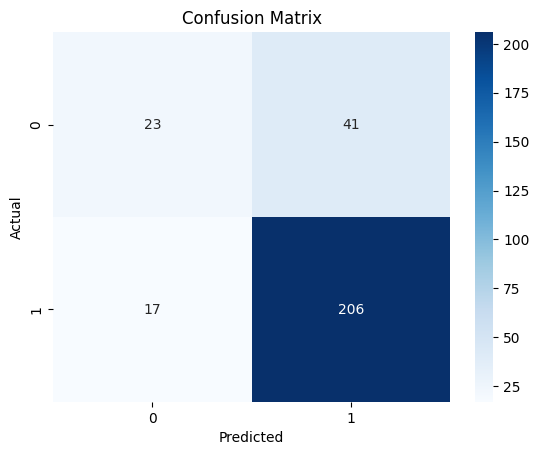

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## 6. Make predictions using a custom threshhold

- using a custom threshold (like `0.75` instead of the default `0.5`)
- when you weigh more on precision.


Accuracy: 0.65

 Confusion Matrix:
[[ 39  25]
 [ 76 147]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.61      0.44        64
           1       0.85      0.66      0.74       223

    accuracy                           0.65       287
   macro avg       0.60      0.63      0.59       287
weighted avg       0.74      0.65      0.68       287



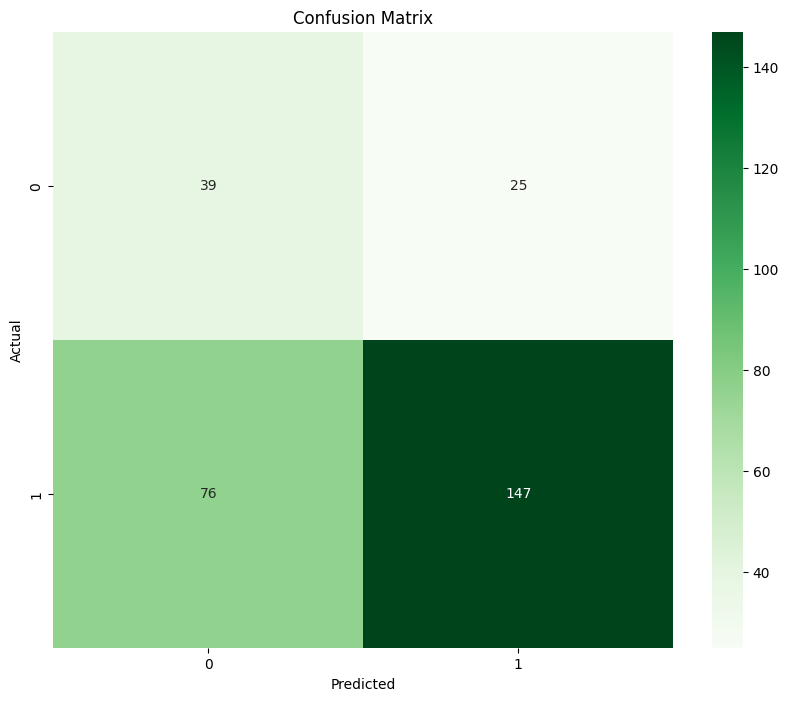

In [ ]:
y_prob = classtreeModel.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# threshhold
threshhold = 0.75
y_pred_custom = (y_prob >= threshhold).astype(int)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy: {accuracy:.2f}")

# custom confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom)
print("\n Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=[10, 8])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# the classification report
class_report = classification_report(y_test, y_pred_custom)
print("\n Classification Report:")
print(class_report)